In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt

In [ ]:
# dataset can be found at: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [27]:
def prepare_dataset():
    df = pd.read_csv('train.csv')
    return df

In [28]:
df = prepare_dataset()
df['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

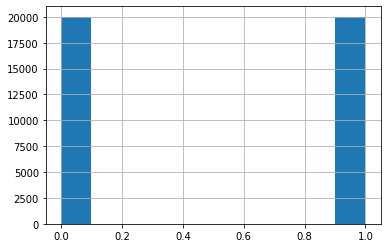

In [29]:
df['label'].hist()

In [30]:
# df.head()

In [31]:
# df.tail()

In [32]:
def assertions(model, vectorizer):
    sents = []
    predictions = []
    results = []
    y_true = []
    def run(sentences, expect, ifNot):
        for sent in sentences:
            pred = predict(sent, model, vectorizer)[0] == 1
            result = 'Correct' if pred == expect else ifNot
            sents.append(sent)
            predictions.append(pred)
            y_true.append(expect)
            results.append(result)
            
    positives = [
        'this is a great movie',
        'awesome movie'
    ]
    
    run(positives, True, 'False negative')
        
    negatives = [
        'did not like it',
        'worst movie ever'
    ]
    
    run(negatives, False, 'False positive')
    
    df = pd.DataFrame()
    df['Sentences'] = sents
    df['Predictions'] = predictions
    df['Expect'] = y_true
    df['Results'] = results
    
    return df

In [33]:
def predict(sentences, model, vectorizer):
    sentences = sentences if isinstance(sentences, list) else [sentences]
    vector = vectorizer.transform(sentences)
    return model.predict(vector)

In [34]:
def create_train_test(df=df):
    X = df[['text']]
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    return X_train, X_test, y_train, y_test

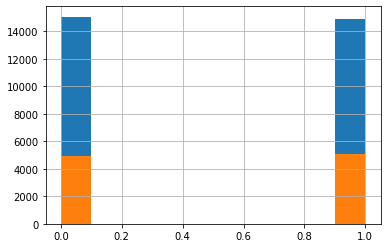

In [35]:
X_train, X_test, y_train, y_test = create_train_test()

y_train.hist()
y_test.hist()

In [36]:
score_funcs = [
    ('Accuracy', accuracy_score),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('F1 Score', f1_score)
]


In [37]:
def train_and_test(model, vectorizer, score_func_list=score_funcs):
    X_train_matrix = vectorizer.fit_transform(X_train['text'])
    model.fit(X_train_matrix, y_train)
    
    X_test_matrix = vectorizer.transform(X_test['text'])
    y_pred = model.predict(X_test_matrix)
    
    for (name, func) in score_func_list: 
        score = func(y_test, y_pred)
        print(name, ': ', score)
  
    return assertions(model, vectorizer)

In [38]:
vectorizer = CountVectorizer()

In [39]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(solver='lbfgs')

train_and_test(regr, vectorizer)

/Users/msarica/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy :  0.8858
Precision :  0.8876984126984127
Recall :  0.885940594059406
F1 Score :  0.8868186323092171


,Sentences,Predictions,Expect,Results
0,this is a great movie,True,True,Correct
1,awesome movie,True,True,Correct
2,did not like it,False,False,Correct
3,worst movie ever,False,False,Correct


In [21]:
predict('this is a great movie.', regr, vectorizer)

array([1])

In [25]:
predict('worst movie ever', regr, vectorizer)

array([0])

In [41]:
import json
def save_model_params(model, vectorizer, file_name='model_params.json'):
    feature_names = vectorizer.get_feature_names()
    
    d = dict()
    d['words'] = feature_names
    d['values'] = model.coef_.tolist()
    d['intercept'] = model.intercept_.tolist()
    d['classes'] = model.classes_.tolist()
    
    with open(file_name, "w") as f:
        f.write(json.dumps(d))

In [42]:
save_model_params(regr, vectorizer)